# TOV following Lindblom 1998
---
Solving TOV equations following Appendix A in [Lindblom (1998)](https://arxiv.org/pdf/gr-qc/9802072), also used in [SpECTRE](https://spectre-code.org/classRelativisticEuler_1_1Solutions_1_1TovSolution.html).

Introducing new variables, $u \equiv r^{2}$, and, $v \equiv m/r$.

\begin{align*}
    \frac{\text{d} u}{\text{d} \log h}
    \ &= \
    -\frac{2 u (1 - 2v)}{4 \pi u p + v} \\
    \frac{\text{d} v}{\text{d} \log h}
    \ &= \
    -\frac{(4 \pi u \rho - v) (1 - 2v)}{4 \pi u p + v} \\
    \frac{\text{d} \log \psi}{\text{d} \log h}
    \ &= \
    \frac{\sqrt{1-2v}}{1 + \sqrt{1-2v}}
    \frac{v}{4 \pi u p + v} 
\end{align*}

Recall that, $h = 1 + p / \rho$, we need to integrate from, $h = h_{c}$, to, $h=1$.

$p/\rho = K \rho^{\Gamma-1}$ 

$\rho = ((h - 1)/K)^{1/(\Gamma-1)}$

In [1]:
import numpy             as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

# Define polytropic constants (using c = G = 1 units for simplicity)
K = 1.0    # Polytropic constant
Γ = 2.0    # Polytropic exponent

# Polytropic Equation of State (EOS)
def p_eos(ρ):
    return K * ρ**Γ

def ρ_eos(p):
    return (p / K)**(1.0 / Γ)

# Define model parameters
ρ_c = 1.0e+0       # Central density
p_c = p_eos(ρ_c)   # Central pressure
h_c = 1.0 + p_c / ρ_c

# TOV Equations
def rhs_tov(log_h, y):
    u, v, logψ  = y
    h           = np.exp(log_h)

    ρ = ( (h - 1.0) / K)**( 1.0 / (Γ - 1.0) )
    p = p_eos(ρ)

    du_dlogh     =                                 - 2.0 * u * (1.0 - 2.0 * v) / (4.0 * np.pi * u * p + v)
    dv_dlogh     =               - (4.0 * np.pi * u * ρ - v) * (1.0 - 2.0 * v) / (4.0 * np.pi * u * p + v)
    dlogψ_dloh_h = np.sqrt(1.0 - 2.0 * v) / (1.0 + np.sqrt(1.0 - 2.0 * v)) * v / (4.0 * np.pi * u * p + v)

    return [du_dlogh, dv_dlogh, dlogψ_dloh_h]


sol = solve_ivp(
    fun           = rhs_tov, 
    t_span        = [np.log(h_c), 0.0], 
    y0            = [1.0e-36, 1.0e-36, 1.1], 
    method        = 'LSODA'
)

In [2]:
log_h        = sol.t
u, v, log_ψ  = sol.y

h = np.exp(log_h)
ψ = np.exp(log_ψ)
r = np.sqrt(u)
m = v * r
ρ = ( (h - 1.0) / K)**( 1.0 / (Γ - 1.0) )
p = p_eos(ρ)
α = np.sqrt(1.0 - 2.0 * m[-1] / r[-1]) / h
R = r / ψ**2


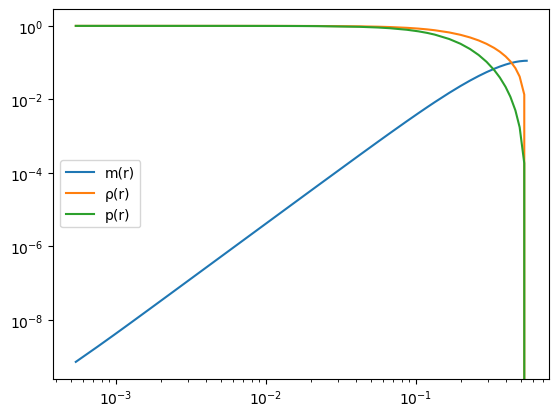

In [3]:
plt.plot(r[1:], m[1:], label='m(r)')
plt.plot(r[1:], ρ[1:], label='ρ(r)')
plt.plot(r[1:], p[1:], label='p(r)')
plt.yscale('log')
plt.xscale('log')
plt.legend()

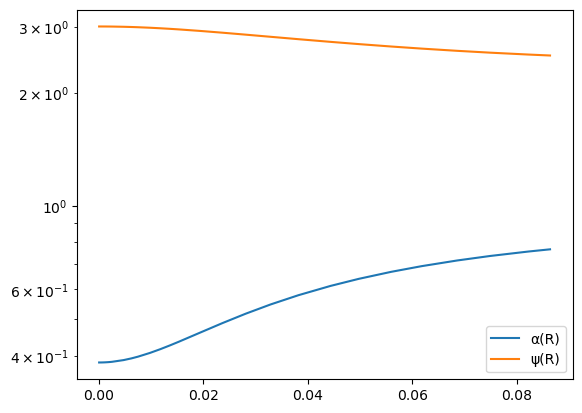

In [4]:
plt.plot(R, α, label='α(R)')
plt.plot(R, ψ, label='ψ(R)')
plt.yscale('log')
# plt.xscale('log')
plt.legend()

In [6]:
# Store the results
np.save(
    file = f'../../data/tov_112.npy',
    arr  = np.stack((r, m, p, ρ, R, α, ψ))
)

In [7]:
import sympy as sp

psi, r, R = sp.symbols('psi r R')

In [8]:
psi = sp.sqrt(r / R)